In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df= pd.read_excel('PD_modelling_dataset.xlsx')

In [3]:
df

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,NaN,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,2635118.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,1442693.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,4575322.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99974,4648093.0,NaN,56102.0,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,18339.0,56180.0,34785.0,9.725278
99975,1247657.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,30602.0,11.585278
99976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.default.value_counts()

default
0.0        88688
1.0         1288
10000.0        1
Name: count, dtype: int64

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
nan_counts = df.isna().sum(axis=1)

# Filter rows with more than 20 NaN values
rows_with_more_than_20_nans = df[nan_counts > 20]

# Display the resulting DataFrame
print(rows_with_more_than_20_nans)


          userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
10     2878722.0      0.0                    0.0                     0.0   
16     4299412.0      0.0                    0.0                     0.0   
38     3569343.0      0.0                    0.0                     NaN   
42     3685794.0      0.0                    0.0                     0.0   
44     3230544.0      0.0                    0.0                     NaN   
...          ...      ...                    ...                     ...   
99929  3884935.0      NaN                    0.0                     0.0   
99940  3992687.0      NaN                    0.0                     0.0   
99962  4111726.0      NaN                    0.0                     0.0   
99969  3403106.0      NaN                    0.0                   365.0   
99976        NaN      NaN                    NaN                     NaN   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
10                         

In [8]:
# Drop rows with more than 20 NaN values
df_filtered = df.dropna(thresh=df.shape[1]-20)

# Display the resulting DataFrame
print(df_filtered)

          userid  default  acct_amt_added_12_24m  acct_days_in_dc_12_24m  \
0      4567129.0      0.0                    0.0                     0.0   
1      2635118.0      0.0                    0.0                     0.0   
2      4804232.0      0.0                    0.0                     0.0   
3      1442693.0      0.0                    0.0                     NaN   
4      4575322.0      0.0                    0.0                     0.0   
...          ...      ...                    ...                     ...   
99972  1744943.0      NaN                    0.0                     0.0   
99973  4333001.0      NaN                45671.0                     0.0   
99974  4648093.0      NaN                56102.0                     0.0   
99975  1247657.0      NaN                    0.0                     0.0   
99978        0.0  10000.0                    0.0                 11836.0   

       acct_days_in_rem_12_24m  acct_days_in_term_12_24m  \
0                          

In [9]:
df_filtered

,userid,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,4567129.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,NaN,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,2635118.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,4804232.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,1442693.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,4575322.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99972,1744943.0,NaN,0.0,0.0,0.0,0.0,0.004044,1.0,1.0,NaN,...,3.0,0.0,0.0,1.0,1.0,0.0,7948.0,0.0,4740.0,21.708333
99973,4333001.0,NaN,45671.0,0.0,20.0,0.0,0.705078,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17447.0,19627.0,3100.0,2.185278
99974,4648093.0,NaN,56102.0,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,18339.0,56180.0,34785.0,9.725278
99975,1247657.0,NaN,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,...,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,30602.0,11.585278


In [10]:
df_filtered.drop('userid', axis = 1, inplace = True)

In [11]:
df_filtered.drop('name_in_email', axis = 1, inplace = True)

In [12]:
df_filtered.drop(99978, inplace = True)

In [13]:
df_filtered

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,NaN,1.0,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99971,NaN,0.0,0.0,0.0,0.0,NaN,1.0,1.0,NaN,NaN,...,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,60127.0,10.765556
99972,NaN,0.0,0.0,0.0,0.0,0.004044,1.0,1.0,NaN,1.0,...,3.0,0.0,0.0,1.0,1.0,0.0,7948.0,0.0,4740.0,21.708333
99973,NaN,45671.0,0.0,20.0,0.0,0.705078,2.0,2.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,17447.0,19627.0,3100.0,2.185278
99974,NaN,56102.0,0.0,0.0,0.0,0.064175,1.0,2.0,1.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,18339.0,56180.0,34785.0,9.725278


In [14]:
df_filtered.shape

(92018, 34)

In [15]:
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
default,82920.0,0.013929,0.117197,0.000000,0.000000,0.000000,0.000000,1.000000e+00
acct_amt_added_12_24m,92018.0,13130.131442,36699.026795,0.000000,0.000000,0.000000,6819.500000,1.128775e+06
acct_days_in_dc_12_24m,81490.0,0.223831,5.769796,0.000000,0.000000,0.000000,0.000000,3.620000e+02
acct_days_in_rem_12_24m,81490.0,5.290036,23.371616,0.000000,0.000000,0.000000,0.000000,3.650000e+02
acct_days_in_term_12_24m,81490.0,0.297644,2.959970,0.000000,0.000000,0.000000,0.000000,9.100000e+01
acct_incoming_debt_vs_paid_0_24m,39284.0,1.296495,26.254301,0.000000,0.000000,0.151956,0.657185,3.914000e+03
acct_status,43836.0,1.041975,0.201894,1.000000,1.000000,1.000000,1.000000,4.000000e+00
acct_worst_status_0_3m,43836.0,1.172735,0.419281,1.000000,1.000000,1.000000,1.000000,4.000000e+00
acct_worst_status_12_24m,32501.0,1.334913,0.572161,1.000000,1.000000,1.000000,2.000000,4.000000e+00
acct_worst_status_3_6m,40887.0,1.184142,0.441583,1.000000,1.000000,1.000000,1.000000,4.000000e+00


In [16]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92018 entries, 0 to 99975
Data columns (total 34 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   default                           82920 non-null  float64
 1   acct_amt_added_12_24m             92018 non-null  float64
 2   acct_days_in_dc_12_24m            81490 non-null  float64
 3   acct_days_in_rem_12_24m           81490 non-null  float64
 4   acct_days_in_term_12_24m          81490 non-null  float64
 5   acct_incoming_debt_vs_paid_0_24m  39284 non-null  float64
 6   acct_status                       43836 non-null  float64
 7   acct_worst_status_0_3m            43836 non-null  float64
 8   acct_worst_status_12_24m          32501 non-null  float64
 9   acct_worst_status_3_6m            40887 non-null  float64
 10  acct_worst_status_6_12m           38517 non-null  float64
 11  age                               92018 non-null  float64
 12  avg_payme

In [17]:
df_filtered['merchant_category'].value_counts()

merchant_category
Diversified entertainment                                  38614
Youthful Shoes & Clothing                                  11755
Books & Magazines                                           9363
General Shoes & Clothing                                    4597
Dietary supplements                                         3101
Diversified children products                               2994
Diversified electronics                                     1844
Children Clothes & Nurturing products                       1500
Pet supplies                                                1315
Sports gear & Outdoor                                       1142
Concept stores & Miscellaneous                              1088
Electronic equipment & Related accessories                  1037
Jewelry & Watches                                            911
Prescription optics                                          899
Body & Hair Care                                             857
Automot

In [18]:
df_filtered['merchant_group'].value_counts()

merchant_group
Entertainment            48779
Clothing & Shoes         16728
Health & Beauty           7356
Children Products         5108
Home & Garden             3718
Leisure                   3076
Electronics               3034
Intangible products       1122
Jewelry & Accessories     1058
Automotive Products        937
Erotic Materials           747
Food & Beverage            355
Name: count, dtype: int64

In [19]:
df_filtered["acct_status"].value_counts()

acct_status
1.0    42006
2.0     1822
3.0        6
4.0        2
Name: count, dtype: int64

In [20]:
df_filtered.isnull().sum()

default                              9098
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m              10528
acct_days_in_rem_12_24m             10528
acct_days_in_term_12_24m            10528
acct_incoming_debt_vs_paid_0_24m    52734
acct_status                         48182
acct_worst_status_0_3m              48182
acct_worst_status_12_24m            59517
acct_worst_status_3_6m              51131
acct_worst_status_6_12m             53501
age                                     0
avg_payment_span_0_12m              19681
avg_payment_span_0_3m               43398
merchant_category                       0
merchant_group                          0
has_paid                             3076
max_paid_inv_0_12m                   3076
max_paid_inv_0_24m                   3076
num_active_div_by_paid_inv_0_12m    21967
num_active_inv                       3076
num_arch_dc_0_12m                    3076
num_arch_dc_12_24m                   3076
num_arch_ok_0_12m                 

In [21]:
# Drop rows with null values in the "default" column
df_cleaned = df_filtered.dropna(subset=['default'])

In [22]:
df_cleaned

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,acct_incoming_debt_vs_paid_0_24m,acct_status,acct_worst_status_0_3m,acct_worst_status_12_24m,acct_worst_status_3_6m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,0.0,0.0,0.0,0.0,0.00000,1.0,1.0,NaN,1.0,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89969,0.0,11018.0,0.0,48.0,0.0,0.50742,1.0,1.0,2.0,1.0,...,5.0,0.0,1.0,1.0,2.0,0.0,9660.0,11615.0,4070.0,21.185278
89970,0.0,0.0,0.0,0.0,0.0,3.05950,2.0,2.0,NaN,NaN,...,3.0,0.0,1.0,1.0,1.0,0.0,2082.0,0.0,16525.0,21.181944
89972,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,9.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6535.0,11.846667
89973,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,47306.0,18.681944


In [23]:
df_cleaned.isnull().sum()

default                                 0
acct_amt_added_12_24m                   0
acct_days_in_dc_12_24m               9496
acct_days_in_rem_12_24m              9496
acct_days_in_term_12_24m             9496
acct_incoming_debt_vs_paid_0_24m    47441
acct_status                         43353
acct_worst_status_0_3m              43353
acct_worst_status_12_24m            53537
acct_worst_status_3_6m              46009
acct_worst_status_6_12m             48133
age                                     0
avg_payment_span_0_12m              17702
avg_payment_span_0_3m               39131
merchant_category                       0
merchant_group                          0
has_paid                             2888
max_paid_inv_0_12m                   2888
max_paid_inv_0_24m                   2888
num_active_div_by_paid_inv_0_12m    19880
num_active_inv                       2888
num_arch_dc_0_12m                    2888
num_arch_dc_12_24m                   2888
num_arch_ok_0_12m                 

In [24]:
print('PERCENT OF MISSING VALUES TO THE WHOLE DATA --->')
print('')
round(df_cleaned.isna().sum()*100/df_cleaned.shape[0], 2)

PERCENT OF MISSING VALUES TO THE WHOLE DATA --->



default                              0.00
acct_amt_added_12_24m                0.00
acct_days_in_dc_12_24m              11.45
acct_days_in_rem_12_24m             11.45
acct_days_in_term_12_24m            11.45
acct_incoming_debt_vs_paid_0_24m    57.21
acct_status                         52.28
acct_worst_status_0_3m              52.28
acct_worst_status_12_24m            64.56
acct_worst_status_3_6m              55.49
acct_worst_status_6_12m             58.05
age                                  0.00
avg_payment_span_0_12m              21.35
avg_payment_span_0_3m               47.19
merchant_category                    0.00
merchant_group                       0.00
has_paid                             3.48
max_paid_inv_0_12m                   3.48
max_paid_inv_0_24m                   3.48
num_active_div_by_paid_inv_0_12m    23.97
num_active_inv                       3.48
num_arch_dc_0_12m                    3.48
num_arch_dc_12_24m                   3.48
num_arch_ok_0_12m                 

In [25]:
# Calculate percentage of missing values for each column
missing_percent = (df_cleaned.isnull().sum() / len(df_cleaned)) * 100



In [26]:
missing_percent

default                              0.000000
acct_amt_added_12_24m                0.000000
acct_days_in_dc_12_24m              11.452002
acct_days_in_rem_12_24m             11.452002
acct_days_in_term_12_24m            11.452002
acct_incoming_debt_vs_paid_0_24m    57.212976
acct_status                         52.282923
acct_worst_status_0_3m              52.282923
acct_worst_status_12_24m            64.564641
acct_worst_status_3_6m              55.486011
acct_worst_status_6_12m             58.047516
age                                  0.000000
avg_payment_span_0_12m              21.348288
avg_payment_span_0_3m               47.191269
merchant_category                    0.000000
merchant_group                       0.000000
has_paid                             3.482875
max_paid_inv_0_12m                   3.482875
max_paid_inv_0_24m                   3.482875
num_active_div_by_paid_inv_0_12m    23.974916
num_active_inv                       3.482875
num_arch_dc_0_12m                 

In [27]:
# Identify columns with missing values exceeding 21%
columns_to_drop = missing_percent[missing_percent > 21].index

# Drop columns with missing values exceeding 21%
df_cleaned.drop(columns=columns_to_drop, inplace=True)

In [28]:
df_cleaned.shape

(82920, 25)

In [29]:
df_cleaned.columns

Index(['default', 'acct_amt_added_12_24m', 'acct_days_in_dc_12_24m',
       'acct_days_in_rem_12_24m', 'acct_days_in_term_12_24m', 'age',
       'merchant_category', 'merchant_group', 'has_paid', 'max_paid_inv_0_12m',
       'max_paid_inv_0_24m', 'num_active_inv', 'num_arch_dc_0_12m',
       'num_arch_dc_12_24m', 'num_arch_ok_0_12m', 'num_arch_ok_12_24m',
       'num_arch_rem_0_12m', 'status_max_archived_0_6_months',
       'status_max_archived_0_12_months', 'status_max_archived_0_24_months',
       'recovery_debt', 'sum_capital_paid_acct_0_12m',
       'sum_capital_paid_acct_12_24m', 'sum_paid_inv_0_12m', 'time_hours'],
      dtype='object')

In [30]:
df_cleaned.has_paid.value_counts()

has_paid
1.0    69287
0.0    10745
Name: count, dtype: int64

In [31]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with 'most_frequent' strategy
imputer = SimpleImputer(strategy='most_frequent')

# Impute missing values for has_paid column
df_cleaned['has_paid'] = imputer.fit_transform(df_cleaned[['has_paid']])

In [32]:
df_cleaned.has_paid.value_counts()

has_paid
1.0    72175
0.0    10745
Name: count, dtype: int64

In [33]:
df_cleaned

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,merchant_category,merchant_group,has_paid,max_paid_inv_0_12m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,0.0,0.0,0.0,0.0,20.0,Dietary supplements,Health & Beauty,1.0,31638.0,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,0.0,0.0,0.0,0.0,50.0,Books & Magazines,Entertainment,1.0,13749.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,0.0,0.0,0.0,0.0,22.0,Diversified entertainment,Entertainment,1.0,29890.0,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,0.0,NaN,NaN,NaN,36.0,Diversified entertainment,Entertainment,1.0,40040.0,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,0.0,0.0,0.0,0.0,25.0,Electronic equipment & Related accessories,Electronics,1.0,7100.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89969,0.0,11018.0,0.0,48.0,0.0,48.0,Diversified entertainment,Entertainment,1.0,1000.0,...,5.0,0.0,1.0,1.0,2.0,0.0,9660.0,11615.0,4070.0,21.185278
89970,0.0,0.0,0.0,0.0,0.0,32.0,Youthful Shoes & Clothing,Clothing & Shoes,1.0,5965.0,...,3.0,0.0,1.0,1.0,1.0,0.0,2082.0,0.0,16525.0,21.181944
89972,0.0,0.0,0.0,0.0,0.0,25.0,Diversified entertainment,Entertainment,1.0,2380.0,...,9.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6535.0,11.846667
89973,0.0,0.0,0.0,0.0,0.0,34.0,Youthful Shoes & Clothing,Clothing & Shoes,1.0,10790.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,47306.0,18.681944


In [34]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82920 entries, 0 to 89974
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   default                          82920 non-null  float64
 1   acct_amt_added_12_24m            82920 non-null  float64
 2   acct_days_in_dc_12_24m           73424 non-null  float64
 3   acct_days_in_rem_12_24m          73424 non-null  float64
 4   acct_days_in_term_12_24m         73424 non-null  float64
 5   age                              82920 non-null  float64
 6   merchant_category                82920 non-null  object 
 7   merchant_group                   82920 non-null  object 
 8   has_paid                         82920 non-null  float64
 9   max_paid_inv_0_12m               80032 non-null  float64
 10  max_paid_inv_0_24m               80032 non-null  float64
 11  num_active_inv                   80032 non-null  float64
 12  num_arch_dc_0_12m      

In [35]:
df_num= df_cleaned.select_dtypes(['float64','int64'])

In [36]:
df_num

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,31638.0,31638.0,2.0,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,0.0,0.0,0.0,0.0,50.0,1.0,13749.0,13749.0,0.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,0.0,0.0,0.0,0.0,22.0,1.0,29890.0,29890.0,1.0,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,0.0,NaN,NaN,NaN,36.0,1.0,40040.0,40040.0,1.0,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,0.0,0.0,0.0,0.0,25.0,1.0,7100.0,7100.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89969,0.0,11018.0,0.0,48.0,0.0,48.0,1.0,1000.0,2560.0,0.0,...,5.0,0.0,1.0,1.0,2.0,0.0,9660.0,11615.0,4070.0,21.185278
89970,0.0,0.0,0.0,0.0,0.0,32.0,1.0,5965.0,8268.0,0.0,...,3.0,0.0,1.0,1.0,1.0,0.0,2082.0,0.0,16525.0,21.181944
89972,0.0,0.0,0.0,0.0,0.0,25.0,1.0,2380.0,2380.0,0.0,...,9.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6535.0,11.846667
89973,0.0,0.0,0.0,0.0,0.0,34.0,1.0,10790.0,10790.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,47306.0,18.681944


In [37]:
df_cat= df_cleaned.select_dtypes(['object'])

In [38]:
df_cat

,merchant_category,merchant_group
0,Dietary supplements,Health & Beauty
1,Books & Magazines,Entertainment
2,Diversified entertainment,Entertainment
3,Diversified entertainment,Entertainment
4,Electronic equipment & Related accessories,Electronics
...,...,...
89969,Diversified entertainment,Entertainment
89970,Youthful Shoes & Clothing,Clothing & Shoes
89972,Diversified entertainment,Entertainment
89973,Youthful Shoes & Clothing,Clothing & Shoes


In [39]:
from sklearn.impute import SimpleImputer

In [40]:
# Create an instance of SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

# Fit and transform the imputer to replace NaN values with the median of each column
df_imputed = imputer.fit_transform(df_num)

# Convert the result back to a DataFrame if needed
df_imputed = pd.DataFrame(df_imputed, columns=df_num.columns)

In [41]:
df_imputed

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,31638.0,31638.0,2.0,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,0.0,0.0,0.0,0.0,50.0,1.0,13749.0,13749.0,0.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,0.0,0.0,0.0,0.0,22.0,1.0,29890.0,29890.0,1.0,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,0.0,0.0,0.0,0.0,36.0,1.0,40040.0,40040.0,1.0,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,0.0,0.0,0.0,0.0,25.0,1.0,7100.0,7100.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82915,0.0,11018.0,0.0,48.0,0.0,48.0,1.0,1000.0,2560.0,0.0,...,5.0,0.0,1.0,1.0,2.0,0.0,9660.0,11615.0,4070.0,21.185278
82916,0.0,0.0,0.0,0.0,0.0,32.0,1.0,5965.0,8268.0,0.0,...,3.0,0.0,1.0,1.0,1.0,0.0,2082.0,0.0,16525.0,21.181944
82917,0.0,0.0,0.0,0.0,0.0,25.0,1.0,2380.0,2380.0,0.0,...,9.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6535.0,11.846667
82918,0.0,0.0,0.0,0.0,0.0,34.0,1.0,10790.0,10790.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,47306.0,18.681944


In [42]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82920 entries, 0 to 82919
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   default                          82920 non-null  float64
 1   acct_amt_added_12_24m            82920 non-null  float64
 2   acct_days_in_dc_12_24m           82920 non-null  float64
 3   acct_days_in_rem_12_24m          82920 non-null  float64
 4   acct_days_in_term_12_24m         82920 non-null  float64
 5   age                              82920 non-null  float64
 6   has_paid                         82920 non-null  float64
 7   max_paid_inv_0_12m               82920 non-null  float64
 8   max_paid_inv_0_24m               82920 non-null  float64
 9   num_active_inv                   82920 non-null  float64
 10  num_arch_dc_0_12m                82920 non-null  float64
 11  num_arch_dc_12_24m               82920 non-null  float64
 12  num_arch_ok_0_12m 

In [43]:
df1 = df_imputed.merge(df_cat, how='outer', left_index=True, right_index=True)

In [44]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82920 entries, 0 to 89974
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   merchant_category  82920 non-null  object
 1   merchant_group     82920 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [45]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89386 entries, 0 to 89974
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   default                          82920 non-null  float64
 1   acct_amt_added_12_24m            82920 non-null  float64
 2   acct_days_in_dc_12_24m           82920 non-null  float64
 3   acct_days_in_rem_12_24m          82920 non-null  float64
 4   acct_days_in_term_12_24m         82920 non-null  float64
 5   age                              82920 non-null  float64
 6   has_paid                         82920 non-null  float64
 7   max_paid_inv_0_12m               82920 non-null  float64
 8   max_paid_inv_0_24m               82920 non-null  float64
 9   num_active_inv                   82920 non-null  float64
 10  num_arch_dc_0_12m                82920 non-null  float64
 11  num_arch_dc_12_24m               82920 non-null  float64
 12  num_arch_ok_0_12m      

In [46]:
df1

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,...,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours,merchant_category,merchant_group
0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,31638.0,31638.0,2.0,...,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333,Dietary supplements,Health & Beauty
1,0.0,0.0,0.0,0.0,0.0,50.0,1.0,13749.0,13749.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389,Books & Magazines,Entertainment
2,0.0,0.0,0.0,0.0,0.0,22.0,1.0,29890.0,29890.0,1.0,...,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944,Diversified entertainment,Entertainment
3,0.0,0.0,0.0,0.0,0.0,36.0,1.0,40040.0,40040.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111,Diversified entertainment,Entertainment
4,0.0,0.0,0.0,0.0,0.0,25.0,1.0,7100.0,7100.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611,Electronic equipment & Related accessories,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diversified entertainment,Entertainment
89970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youthful Shoes & Clothing,Clothing & Shoes
89972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diversified entertainment,Entertainment
89973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Youthful Shoes & Clothing,Clothing & Shoes


In [47]:
df1.default.isnull().sum()

6466

In [48]:
# Drop rows where 'default' column has null values
df1 = df1.dropna(subset=['default'])

In [49]:
df1

,default,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,...,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours,merchant_category,merchant_group
0,0.0,0.0,0.0,0.0,0.0,20.0,1.0,31638.0,31638.0,2.0,...,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333,Dietary supplements,Health & Beauty
1,0.0,0.0,0.0,0.0,0.0,50.0,1.0,13749.0,13749.0,0.0,...,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389,Books & Magazines,Entertainment
2,0.0,0.0,0.0,0.0,0.0,22.0,1.0,29890.0,29890.0,1.0,...,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944,Diversified entertainment,Entertainment
3,0.0,0.0,0.0,0.0,0.0,36.0,1.0,40040.0,40040.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111,Diversified entertainment,Entertainment
4,0.0,0.0,0.0,0.0,0.0,25.0,1.0,7100.0,7100.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611,Electronic equipment & Related accessories,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82915,0.0,11018.0,0.0,48.0,0.0,48.0,1.0,1000.0,2560.0,0.0,...,1.0,1.0,2.0,0.0,9660.0,11615.0,4070.0,21.185278,Hobby articles,Leisure
82916,0.0,0.0,0.0,0.0,0.0,32.0,1.0,5965.0,8268.0,0.0,...,1.0,1.0,1.0,0.0,2082.0,0.0,16525.0,21.181944,General Shoes & Clothing,Clothing & Shoes
82917,0.0,0.0,0.0,0.0,0.0,25.0,1.0,2380.0,2380.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,6535.0,11.846667,Books & Magazines,Entertainment
82918,0.0,0.0,0.0,0.0,0.0,34.0,1.0,10790.0,10790.0,0.0,...,1.0,1.0,1.0,0.0,0.0,0.0,47306.0,18.681944,Books & Magazines,Entertainment


In [50]:
df_X=df1.drop(['default','merchant_category', 'merchant_group',], axis=1)
df_y=df1.default

In [51]:
df_X

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,0.0,0.0,0.0,0.0,20.0,1.0,31638.0,31638.0,2.0,0.0,...,14.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,178839.0,9.653333
1,0.0,0.0,0.0,0.0,50.0,1.0,13749.0,13749.0,0.0,0.0,...,19.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,49014.0,13.181389
2,0.0,0.0,0.0,0.0,22.0,1.0,29890.0,29890.0,1.0,0.0,...,0.0,3.0,1.0,2.0,2.0,0.0,0.0,0.0,124839.0,11.561944
3,0.0,0.0,0.0,0.0,36.0,1.0,40040.0,40040.0,1.0,0.0,...,21.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,324676.0,15.751111
4,0.0,0.0,0.0,0.0,25.0,1.0,7100.0,7100.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,7100.0,12.698611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82915,11018.0,0.0,48.0,0.0,48.0,1.0,1000.0,2560.0,0.0,0.0,...,5.0,0.0,1.0,1.0,2.0,0.0,9660.0,11615.0,4070.0,21.185278
82916,0.0,0.0,0.0,0.0,32.0,1.0,5965.0,8268.0,0.0,0.0,...,3.0,0.0,1.0,1.0,1.0,0.0,2082.0,0.0,16525.0,21.181944
82917,0.0,0.0,0.0,0.0,25.0,1.0,2380.0,2380.0,0.0,0.0,...,9.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,6535.0,11.846667
82918,0.0,0.0,0.0,0.0,34.0,1.0,10790.0,10790.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,47306.0,18.681944


In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df_X), columns = df_X.columns)

In [53]:
scaled_df

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_12m,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,...,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_12_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
0,-0.359086,-0.036588,-0.213003,-0.095063,-1.242732,0.385842,1.654876,1.339138,0.883122,-0.161576,...,0.460494,-0.341025,0.244385,-0.093795,-0.296710,-0.030688,-0.399539,-0.336269,1.511439,-1.154922
1,-0.359086,-0.036588,-0.213003,-0.095063,1.153474,0.385842,0.331015,0.159899,-0.381935,-0.161576,...,0.775638,1.856844,0.244385,1.217308,0.941497,-0.030688,-0.399539,-0.336269,0.095873,-0.441414
2,-0.359086,-0.036588,-0.213003,-0.095063,-1.082985,0.385842,1.525517,1.223910,0.250593,-0.161576,...,-0.421910,1.856844,0.244385,1.217308,0.941497,-0.030688,-0.399539,-0.336269,0.922642,-0.768928
3,-0.359086,-0.036588,-0.213003,-0.095063,0.035245,0.385842,2.276659,1.892995,0.250593,-0.161576,...,0.901695,-0.341025,0.244385,-0.093795,-0.296710,-0.030688,-0.399539,-0.336269,3.101596,0.078281
4,-0.359086,-0.036588,-0.213003,-0.095063,-0.843364,0.385842,-0.161039,-0.278401,-0.381935,-0.161576,...,-0.421910,-0.341025,0.244385,-0.093795,-0.296710,-0.030688,-0.399539,-0.336269,-0.361143,-0.539050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82915,-0.058677,-0.036588,1.950813,-0.095063,0.993727,0.385842,-0.612465,-0.577677,-0.381935,-0.161576,...,-0.106766,-0.341025,0.244385,-0.093795,0.941497,-0.030688,-0.031846,0.271634,-0.394181,1.177277
82916,-0.359086,-0.036588,-0.213003,-0.095063,-0.284249,0.385842,-0.245034,-0.201407,-0.381935,-0.161576,...,-0.232824,-0.341025,0.244385,-0.093795,-0.296710,-0.030688,-0.320291,-0.336269,-0.258376,1.176603
82917,-0.359086,-0.036588,-0.213003,-0.095063,-0.843364,0.385842,-0.510339,-0.589542,-0.381935,-0.161576,...,0.145349,-0.341025,0.244385,-0.093795,-0.296710,-0.030688,-0.399539,-0.336269,-0.367304,-0.711346
82918,-0.359086,-0.036588,-0.213003,-0.095063,-0.124502,0.385842,0.112037,-0.035157,-0.381935,-0.161576,...,-0.421910,-0.341025,0.244385,-0.093795,-0.296710,-0.030688,-0.399539,-0.336269,0.077249,0.671008


In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [55]:
calc_vif(scaled_df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
11,num_arch_ok_0_12m,5.456129
6,max_paid_inv_0_12m,5.386709
15,status_max_archived_0_12_months,5.326012
7,max_paid_inv_0_24m,5.021834
16,status_max_archived_0_24_months,4.452601
12,num_arch_ok_12_24m,4.069201
20,sum_paid_inv_0_12m,3.252244
14,status_max_archived_0_6_months,2.303065
0,acct_amt_added_12_24m,2.163006
19,sum_capital_paid_acct_12_24m,2.049926


In [56]:
scaled_df = scaled_df.drop('num_arch_ok_0_12m', axis = 1)

In [57]:
def calc_vif1(scaled_df):

    # Calculating VIF
    vif1 = pd.DataFrame()
    vif1["variables"] = scaled_df.columns
    vif1["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif1)

In [58]:
calc_vif1(scaled_df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
6,max_paid_inv_0_12m,5.386055
14,status_max_archived_0_12_months,5.309073
7,max_paid_inv_0_24m,4.999189
15,status_max_archived_0_24_months,4.445206
19,sum_paid_inv_0_12m,2.848655
13,status_max_archived_0_6_months,2.278496
0,acct_amt_added_12_24m,2.163003
18,sum_capital_paid_acct_12_24m,2.049395
11,num_arch_ok_12_24m,1.953393
17,sum_capital_paid_acct_0_12m,1.817005


In [59]:
scaled_df = scaled_df.drop('max_paid_inv_0_12m', axis = 1)

In [60]:
def calc_vif2(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [61]:
calc_vif2(scaled_df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,status_max_archived_0_12_months,5.242182
14,status_max_archived_0_24_months,4.412726
18,sum_paid_inv_0_12m,2.633566
12,status_max_archived_0_6_months,2.271101
0,acct_amt_added_12_24m,2.162935
17,sum_capital_paid_acct_12_24m,2.049395
10,num_arch_ok_12_24m,1.909265
16,sum_capital_paid_acct_0_12m,1.816145
7,num_active_inv,1.813453
5,has_paid,1.784001


In [62]:
scaled_df = scaled_df.drop('status_max_archived_0_12_months', axis = 1)

In [63]:
def calc_vif3(scaled_df):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = scaled_df.columns
    vif["VIF"] = [variance_inflation_factor(scaled_df.values, i) for i in range(scaled_df.shape[1])]

    return(vif)

In [64]:
calc_vif3(scaled_df).sort_values(by = 'VIF', ascending = False)

,variables,VIF
13,status_max_archived_0_24_months,2.637405
17,sum_paid_inv_0_12m,2.630736
0,acct_amt_added_12_24m,2.162881
16,sum_capital_paid_acct_12_24m,2.049394
10,num_arch_ok_12_24m,1.908902
12,status_max_archived_0_6_months,1.832901
15,sum_capital_paid_acct_0_12m,1.816145
7,num_active_inv,1.812537
5,has_paid,1.770315
11,num_arch_rem_0_12m,1.716914


In [65]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82920 entries, 0 to 82919
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   acct_amt_added_12_24m            82920 non-null  float64
 1   acct_days_in_dc_12_24m           82920 non-null  float64
 2   acct_days_in_rem_12_24m          82920 non-null  float64
 3   acct_days_in_term_12_24m         82920 non-null  float64
 4   age                              82920 non-null  float64
 5   has_paid                         82920 non-null  float64
 6   max_paid_inv_0_24m               82920 non-null  float64
 7   num_active_inv                   82920 non-null  float64
 8   num_arch_dc_0_12m                82920 non-null  float64
 9   num_arch_dc_12_24m               82920 non-null  float64
 10  num_arch_ok_12_24m               82920 non-null  float64
 11  num_arch_rem_0_12m               82920 non-null  float64
 12  status_max_archive

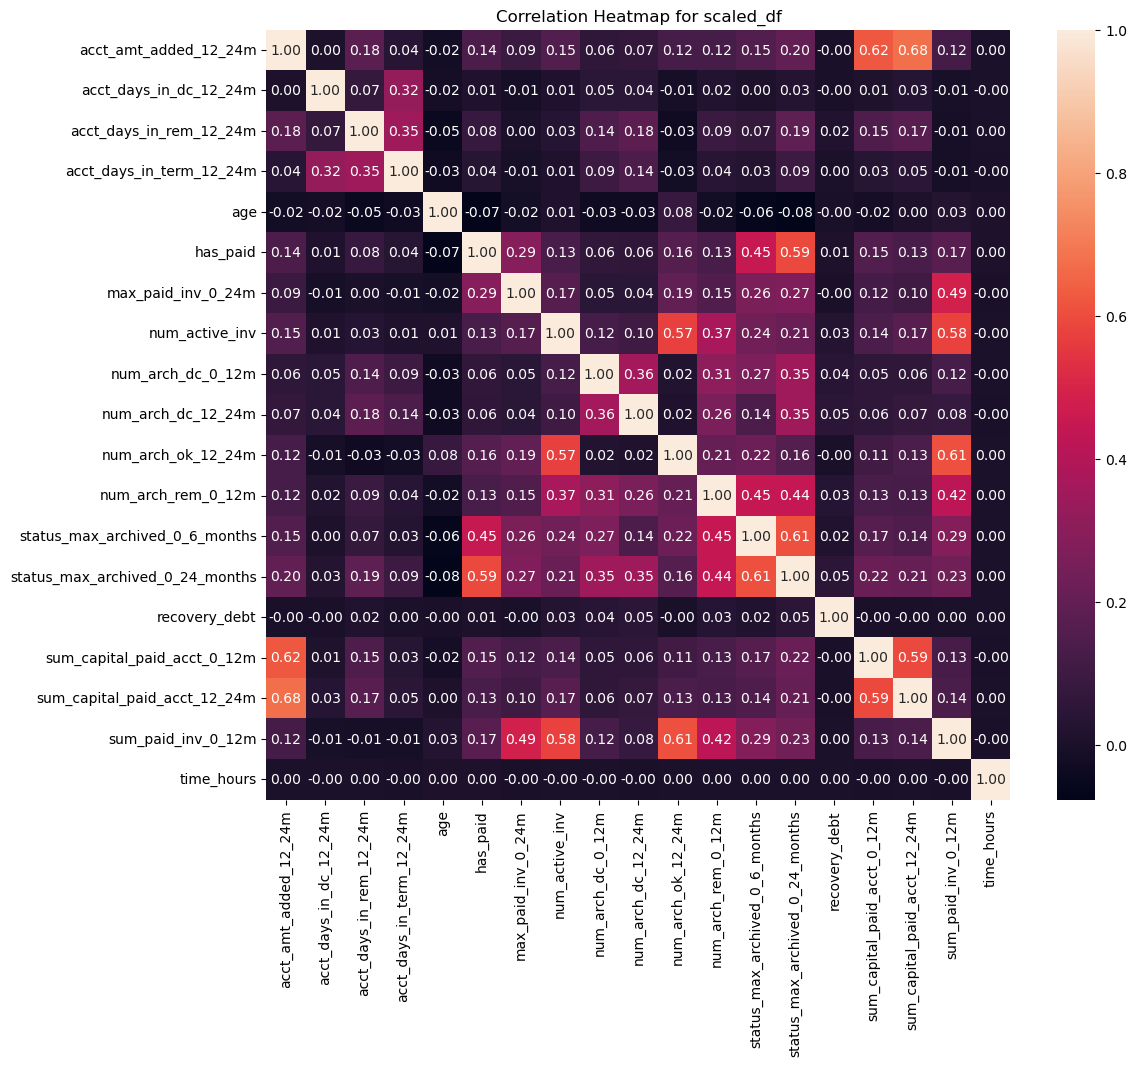

In [66]:
plt.figure(figsize=(12,10))
sns.heatmap(scaled_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap for scaled_df')
plt.show()

In [67]:
df_y.value_counts()

default
0.0    81765
1.0     1155
Name: count, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df,df_y,
                                        test_size = 0.30, random_state = 1, stratify = df_y)

In [70]:
X_train

,acct_amt_added_12_24m,acct_days_in_dc_12_24m,acct_days_in_rem_12_24m,acct_days_in_term_12_24m,age,has_paid,max_paid_inv_0_24m,num_active_inv,num_arch_dc_0_12m,num_arch_dc_12_24m,num_arch_ok_12_24m,num_arch_rem_0_12m,status_max_archived_0_6_months,status_max_archived_0_24_months,recovery_debt,sum_capital_paid_acct_0_12m,sum_capital_paid_acct_12_24m,sum_paid_inv_0_12m,time_hours
74913,0.117811,-0.036588,-0.213003,-0.095063,-1.162859,0.385842,-0.404637,-0.381935,-0.161576,-0.160792,-0.421910,-0.341025,0.244385,-0.296710,-0.030688,0.731515,-0.336269,-0.372319,-1.360699
24782,-0.359086,-0.036588,-0.213003,-0.095063,-1.242732,0.385842,-0.198638,-0.381935,-0.161576,-0.160792,-0.421910,-0.341025,0.244385,-0.296710,-0.030688,-0.399539,-0.336269,0.258043,-1.354014
49941,-0.296485,-0.036588,-0.213003,-0.095063,0.674233,0.385842,-0.173259,-0.381935,-0.161576,-0.160792,2.162272,0.391598,1.663959,0.941497,-0.030688,-0.396798,-0.216939,-0.193718,-1.151832
74317,-0.359086,-0.036588,-0.213003,-0.095063,-0.204376,0.385842,0.260823,-0.381935,-0.161576,-0.160792,-0.421910,-0.341025,-1.175188,-0.296710,-0.030688,-0.399539,-0.336269,0.150413,-1.021276
63660,-0.359086,-0.036588,-0.213003,-0.095063,-0.603744,0.385842,-0.035750,1.515650,-0.161576,5.408489,-0.232824,1.856844,1.663959,2.179703,-0.030688,-0.388462,-0.336269,0.292978,-0.232772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18625,-0.359086,-0.036588,-0.213003,-0.095063,1.552842,0.385842,0.126017,-0.381935,2.500428,2.623849,-0.106766,0.391598,1.663959,2.179703,-0.030688,-0.399539,-0.336269,-0.134205,-0.190751
42113,0.031653,-0.036588,-0.213003,-0.095063,2.351578,0.385842,-0.170622,-0.381935,-0.161576,-0.160792,-0.169795,-0.341025,0.244385,-0.296710,-0.030688,0.892181,-0.217463,-0.109378,0.559046
78260,1.139659,-0.036588,-0.213003,-0.095063,0.594360,0.385842,-0.252363,-0.381935,-0.161576,-0.160792,-0.295852,-0.341025,0.244385,-0.296710,-0.030688,0.504847,2.541416,-0.175563,1.483387
8607,1.136306,-0.036588,-0.213003,-0.095063,1.632716,0.385842,-0.284993,-0.381935,-0.161576,-0.160792,-0.295852,-0.341025,0.244385,-0.296710,-0.030688,1.655732,0.039045,-0.286017,-1.158517


In [71]:
y_train

74913    0.0
24782    0.0
49941    0.0
74317    0.0
63660    0.0
        ... 
18625    0.0
42113    0.0
78260    0.0
8607     0.0
4466     0.0
Name: default, Length: 58044, dtype: float64

In [72]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state= 1, sampling_strategy=0.67)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [73]:
print('Resampled proportion:')
print('---------------------------')
print(y_res.value_counts(normalize = True),'\n\n')
print('Original proportion:')
print('--------------------------')
print(df_y.value_counts(normalize = True))


Resampled proportion:
---------------------------
default
0.0    0.598803
1.0    0.401197
Name: proportion, dtype: float64 


Original proportion:
--------------------------
default
0.0    0.986071
1.0    0.013929
Name: proportion, dtype: float64


In [74]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model
log_reg = LogisticRegression()

# Fit the model on the resampled training data
log_reg.fit(X_res, y_res)

# Get the coefficients assigned to each feature
feature_importance = log_reg.coef_[0]

# Match coefficients with feature names
feature_names = X_res.columns

# Create a DataFrame to store feature names and their corresponding coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': feature_importance})

# Sort features by absolute coefficient value to identify the most important features
feature_importance_df['Abs_Coefficient'] = abs(feature_importance_df['Coefficient'])
sorted_features = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display the top N most important features
top_n = 10  # Adjust this value as needed
print("Top", top_n, "Most Important Features:")
print(sorted_features.head(top_n))


# Make predictions on the test data
y_pred_log_reg = log_reg.predict(X_test)

y_pred_log_reg_train = log_reg.predict(X_res)
# Evaluate the model's performance
from sklearn.metrics import classification_report




Top 10 Most Important Features:
                    Feature  Coefficient  Abs_Coefficient
10       num_arch_ok_12_24m    -3.800234         3.800234
17       sum_paid_inv_0_12m    -3.530514         3.530514
7            num_active_inv     0.798691         0.798691
8         num_arch_dc_0_12m     0.523270         0.523270
4                       age    -0.465503         0.465503
6        max_paid_inv_0_24m    -0.430072         0.430072
9        num_arch_dc_12_24m     0.314773         0.314773
2   acct_days_in_rem_12_24m     0.268925         0.268925
11       num_arch_rem_0_12m     0.254058         0.254058
0     acct_amt_added_12_24m     0.250103         0.250103


In [75]:
sorted_features

,Feature,Coefficient,Abs_Coefficient
10,num_arch_ok_12_24m,-3.800234,3.800234
17,sum_paid_inv_0_12m,-3.530514,3.530514
7,num_active_inv,0.798691,0.798691
8,num_arch_dc_0_12m,0.523270,0.523270
4,age,-0.465503,0.465503
6,max_paid_inv_0_24m,-0.430072,0.430072
9,num_arch_dc_12_24m,0.314773,0.314773
2,acct_days_in_rem_12_24m,0.268925,0.268925
11,num_arch_rem_0_12m,0.254058,0.254058
0,acct_amt_added_12_24m,0.250103,0.250103


In [76]:
y_pred_log_reg_train = log_reg.predict(X_res)

In [77]:
print('Updated classification_report for train data:')
print('--------------------------------------------')
print(metrics.classification_report(y_res,y_pred_log_reg_train))
print('======================================================\n')
print('Updated classification_report for test data:')
print('-------------------------------------------')
print(metrics.classification_report(y_test,y_pred_log_reg))

Updated classification_report for train data:
--------------------------------------------
              precision    recall  f1-score   support

         0.0       0.80      0.83      0.81     57236
         1.0       0.73      0.69      0.71     38348

    accuracy                           0.77     95584
   macro avg       0.76      0.76      0.76     95584
weighted avg       0.77      0.77      0.77     95584


Updated classification_report for test data:
-------------------------------------------
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     24529
         1.0       0.05      0.69      0.10       347

    accuracy                           0.82     24876
   macro avg       0.52      0.76      0.50     24876
weighted avg       0.98      0.82      0.89     24876



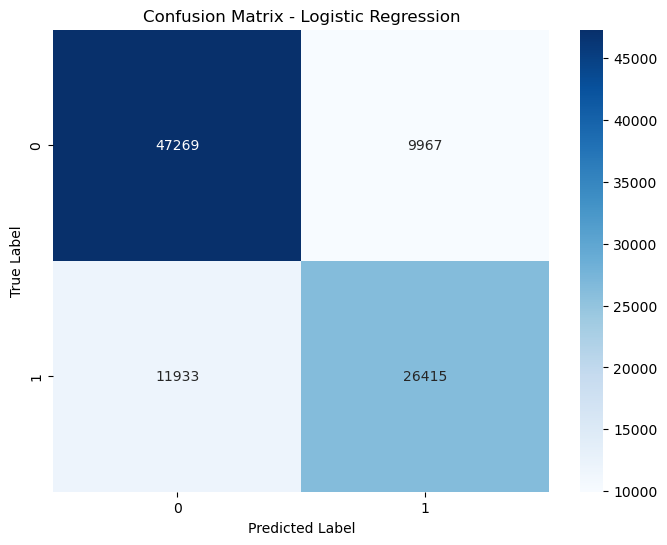

In [78]:
cm_log_reg = confusion_matrix(y_res, y_pred_log_reg_train)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


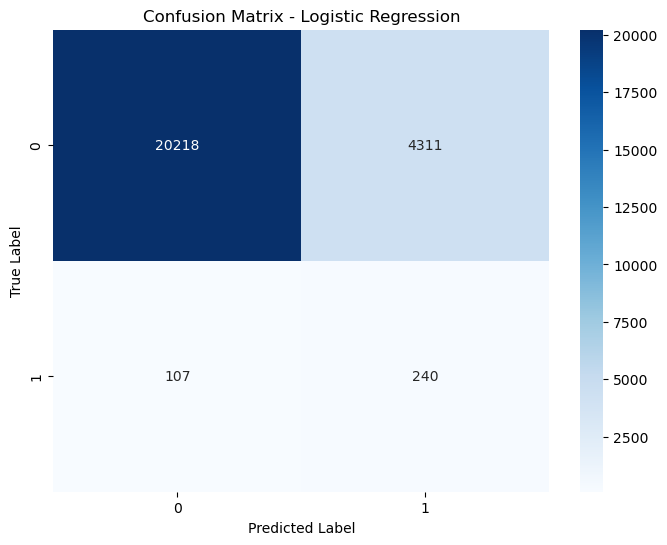

In [79]:
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log_reg, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


AUC: 0.862


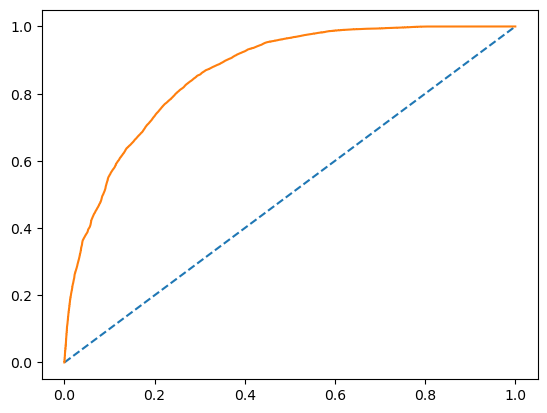

In [80]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
# predict probabilities
probs = log_reg.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.862


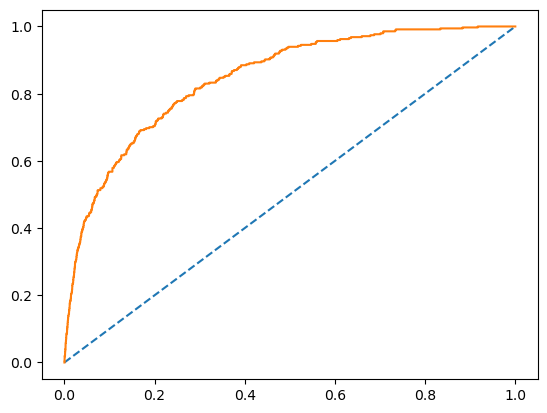

In [81]:
# predict probabilities
probs = log_reg.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization penalty type
}

# Instantiate logistic regression model
log_reg = LogisticRegression()

# Define recall as the scoring metric for grid search
scorer = make_scorer(recall_score)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring=scorer, cv=5)

# Fit GridSearchCV to the resampled training data
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model to make predictions on the test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


Best Parameters: {'C': 100, 'penalty': 'l2'}
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     24529
         1.0       0.05      0.69      0.10       347

    accuracy                           0.82     24876
   macro avg       0.52      0.76      0.50     24876
weighted avg       0.98      0.82      0.89     24876



In [83]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate Decision Tree model
decision_tree = DecisionTreeClassifier()

# Fit the model on the resampled training data
decision_tree.fit(X_res, y_res)

# Make predictions on the test data
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_decision_tree_train = decision_tree.predict(X_res)
# Evaluate the model's performance
# (Use classification metrics like accuracy, precision, recall, F1-score)
# Example:
print(classification_report(y_res, y_pred_decision_tree_train))
print(classification_report(y_test, y_pred_decision_tree))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57236
         1.0       1.00      1.00      1.00     38348

    accuracy                           1.00     95584
   macro avg       1.00      1.00      1.00     95584
weighted avg       1.00      1.00      1.00     95584

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98     24529
         1.0       0.07      0.17      0.10       347

    accuracy                           0.96     24876
   macro avg       0.53      0.57      0.54     24876
weighted avg       0.98      0.96      0.97     24876



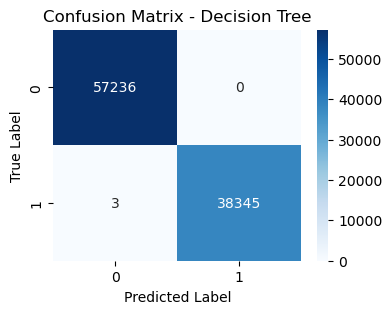

In [84]:
cm_decision_tree = confusion_matrix(y_res, y_pred_decision_tree_train)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

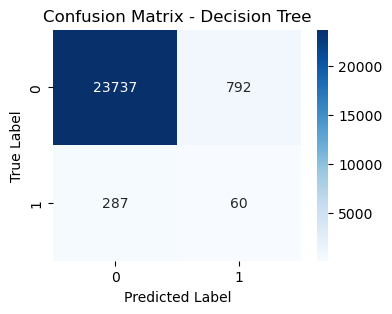

In [85]:
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_decision_tree, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AUC: 1.000


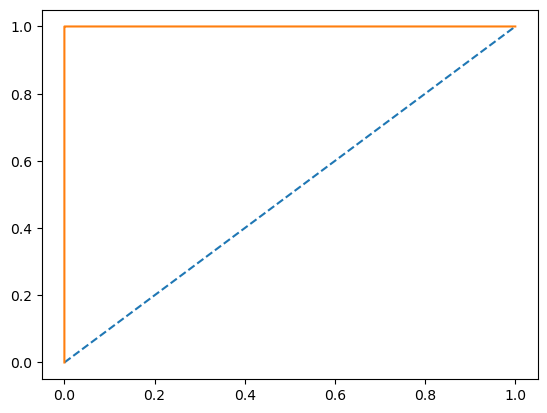

In [86]:
probs = decision_tree.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


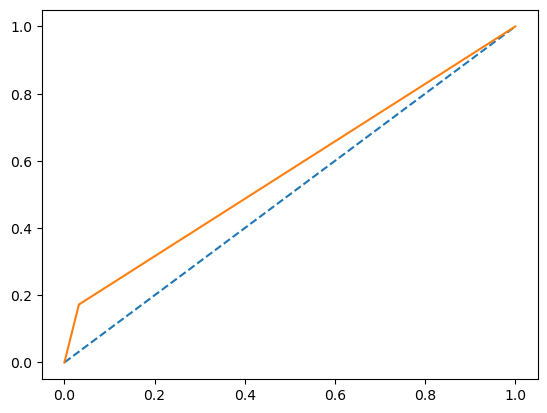

In [87]:
probs = decision_tree.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Instantiate LDA model
lda = LinearDiscriminantAnalysis()

# Fit the model on the resampled training data
lda.fit(X_res, y_res)

# Make predictions on the test data
y_pred_lda = lda.predict(X_test)
y_pred_lda_train = lda.predict(X_res)

print(classification_report(y_res, y_pred_lda_train))
print(classification_report(y_test, y_pred_lda))


              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80     57236
         1.0       0.73      0.55      0.63     38348

    accuracy                           0.74     95584
   macro avg       0.74      0.71      0.71     95584
weighted avg       0.74      0.74      0.73     95584

              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92     24529
         1.0       0.05      0.56      0.10       347

    accuracy                           0.86     24876
   macro avg       0.52      0.71      0.51     24876
weighted avg       0.98      0.86      0.91     24876



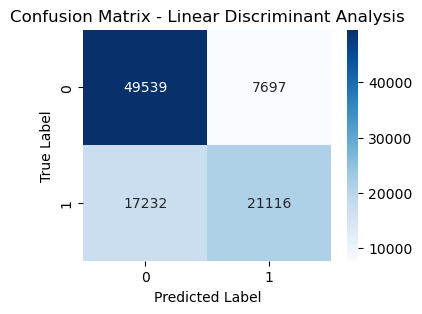

In [89]:
cm_lda = confusion_matrix(y_res, y_pred_lda_train)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Discriminant Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

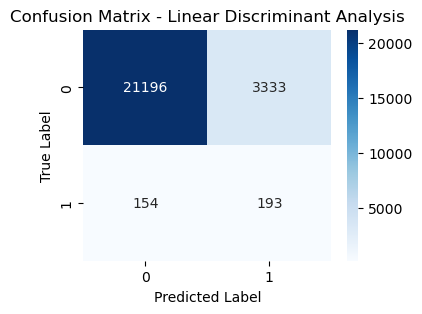

In [90]:
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_lda, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Linear Discriminant Analysis")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AUC: 0.826


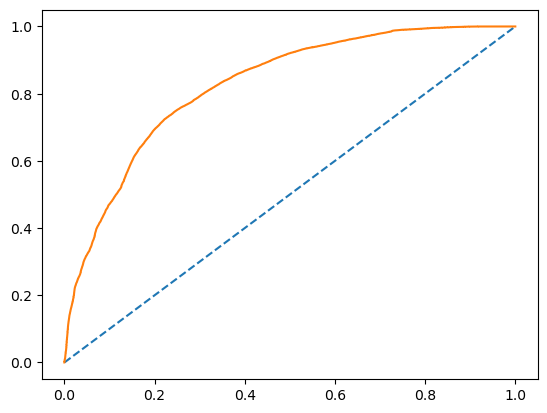

In [91]:
probs = lda.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.826


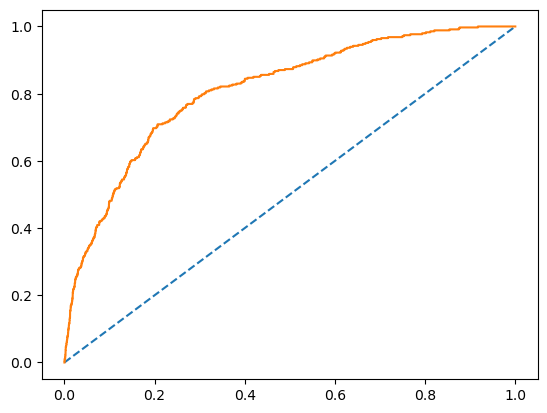

In [92]:
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [93]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the GBM model
gbm = GradientBoostingClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from grid search
best_gbm = grid_search.best_estimator_

# Make predictions on the test set
y_pred_gbm = best_gbm.predict(X_test)
y_pred_gbm_train = best_gbm.predict(X_res)


# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_res, y_pred_gbm_train))
print(classification_report(y_test, y_pred_gbm))


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     57236
         1.0       0.94      0.91      0.93     38348

    accuracy                           0.94     95584
   macro avg       0.94      0.94      0.94     95584
weighted avg       0.94      0.94      0.94     95584

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     24529
         1.0       0.08      0.25      0.12       347

    accuracy                           0.95     24876
   macro avg       0.54      0.61      0.55     24876
weighted avg       0.98      0.95      0.96     24876



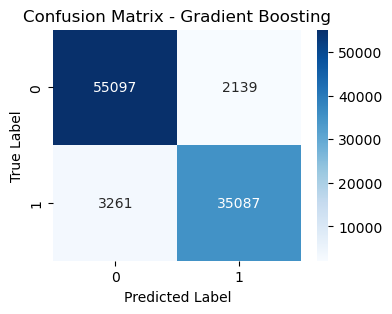

In [94]:
cm_gbm = confusion_matrix(y_res, y_pred_gbm_train)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_gbm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


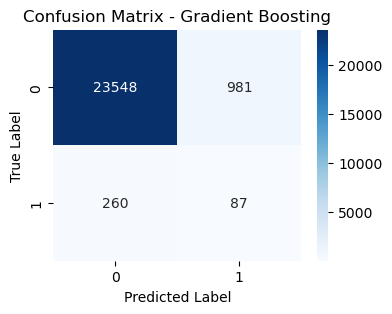

In [95]:
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_gbm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


AUC: 0.989


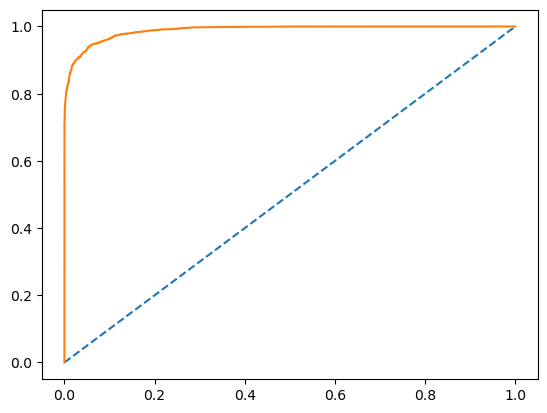

In [96]:
probs = grid_search.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.989


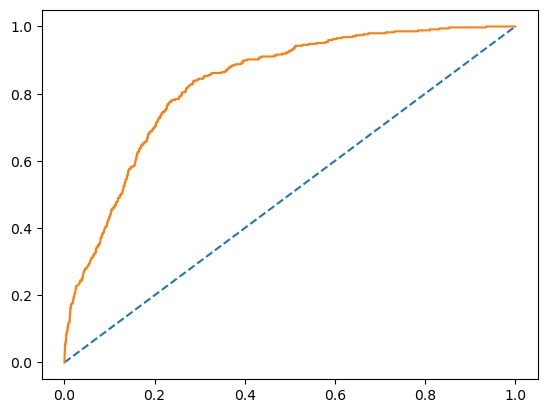

In [97]:
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [98]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the AdaBoost model
adaboost = AdaBoostClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from grid search
best_adaboost = grid_search.best_estimator_

# Make predictions on the test set
y_pred_adaboost_train = best_adaboost.predict(X_res)
y_pred_adaboost = best_adaboost.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_res, y_pred_adaboost_train))
print(classification_report(y_test, y_pred_adaboost))


Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84     57236
         1.0       0.78      0.70      0.74     38348

    accuracy                           0.80     95584
   macro avg       0.80      0.78      0.79     95584
weighted avg       0.80      0.80      0.80     95584

              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93     24529
         1.0       0.06      0.63      0.12       347

    accuracy                           0.87     24876
   macro avg       0.53      0.75      0.52     24876
weighted avg       0.98      0.87      0.92     24876



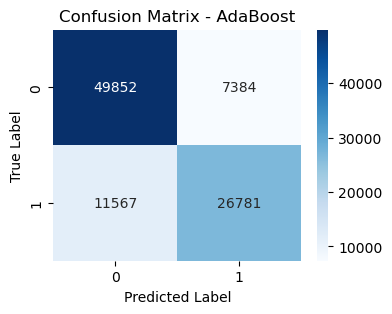

In [99]:
cm_adaboost = confusion_matrix(y_res, y_pred_adaboost_train)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

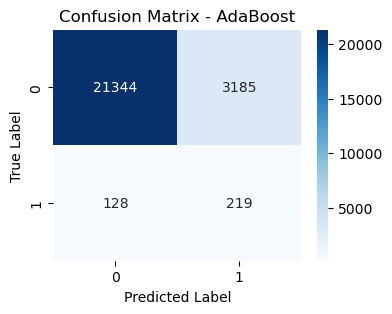

In [100]:
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_adaboost, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - AdaBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AUC: 0.894


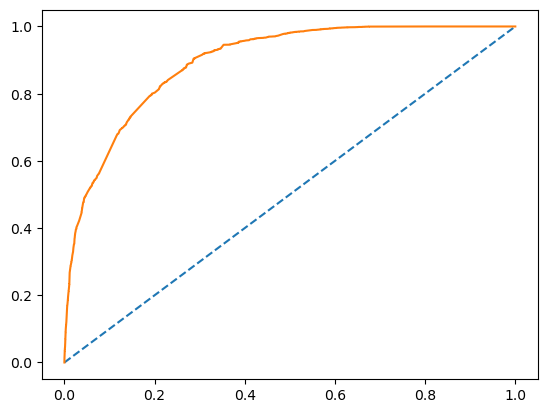

In [101]:
probs = grid_search.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.894


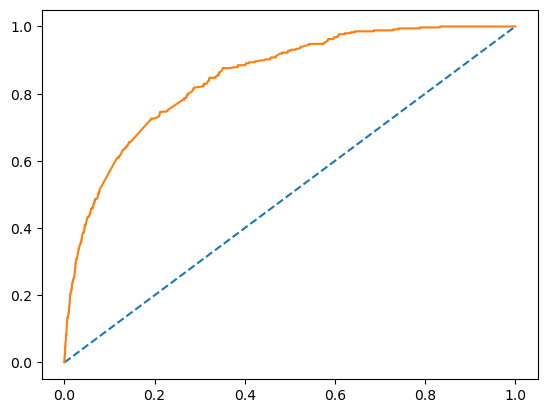

In [102]:
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the Random Forest model
random_forest = RandomForestClassifier()

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)
grid_search.fit(X_res, y_res)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best model from grid search
best_random_forest = grid_search.best_estimator_

# Make predictions on the test set
y_pred_random_forest_train = best_random_forest.predict(X_res)
y_pred_random_forest = best_random_forest.predict(X_test)

# Evaluate the model's performance
print("Classification Report:")
print(classification_report(y_res, y_pred_random_forest_train))
print(classification_report(y_test, y_pred_random_forest))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     57236
         1.0       1.00      1.00      1.00     38348

    accuracy                           1.00     95584
   macro avg       1.00      1.00      1.00     95584
weighted avg       1.00      1.00      1.00     95584

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98     24529
         1.0       0.11      0.16      0.13       347

    accuracy                           0.97     24876
   macro avg       0.55      0.57      0.56     24876
weighted avg       0.98      0.97      0.97     24876



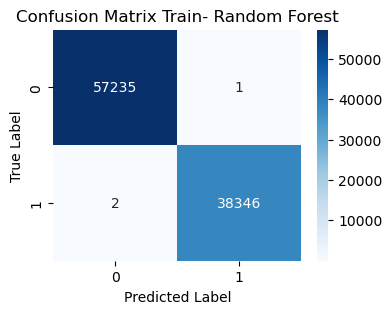

In [104]:
cm_random_forest = confusion_matrix(y_res, y_pred_random_forest_train)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Train- Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

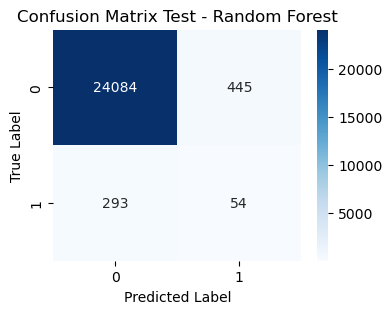

In [105]:
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)
plt.figure(figsize=(4, 3))
sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix Test - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

AUC: 1.000


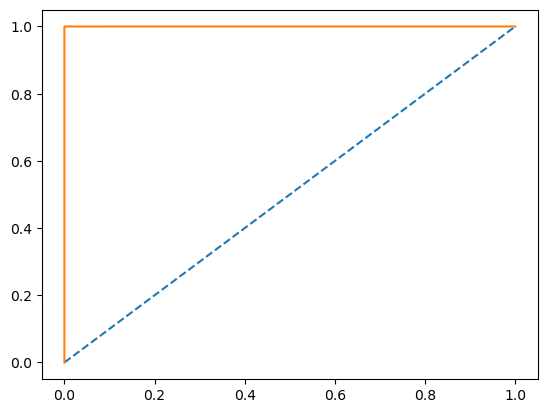

In [106]:
probs = grid_search.predict_proba(X_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 1.000


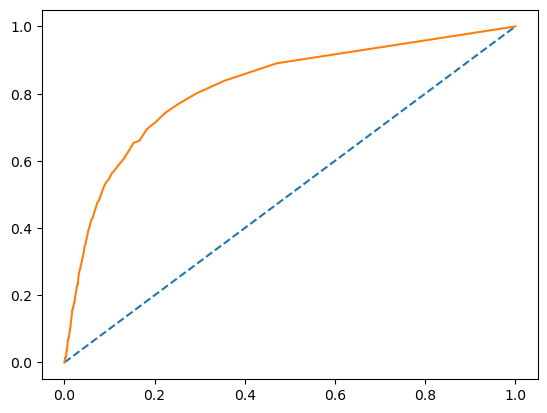

In [107]:
probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);